In [30]:
# Copyright (C) 2017 Josh Edwards <Josh.Edwards222@gmail.com>
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with this.  If not, see <http://www.gnu.org/licenses/>.

In [4]:
!pip install unwrap
!pip install opencv-python

In [5]:
import scipy
import numpy
import PIL
import matplotlib.pyplot as plt
import scipy.fftpack
import math
%matplotlib inline
import numpy.ma as ma
from unwrap import unwrap
import cv2

In [6]:
im = PIL.Image.open('c:/Users/josh/MY Documents/DeepSIM_interference_test.PNG')

please enter the x coordinate of the center of the data circle900
please enter the y coordinate of the center of the data circle975
please enter the diameter of the data circle1200
Is this mask correct? [y,n]y
finished user calibration


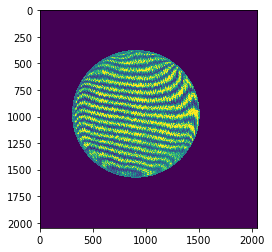

In [31]:
#ask user to specify the size and location of the region of interest
done=False
while done is False:
    #convert image to array and float
    data = numpy.asarray(im)
    datafloat=numpy.zeros((data.shape),dtype=float)
    datafloat=data*1.0
    plt.imshow(data)
    

    x = int(input('please enter the x coordinate of the center of the data circle'))
    y = int(input('please enter the y coordinate of the center of the data circle'))
    DIAMETER = int(input('please enter the diameter of the data circle'))

    MIDDLE = [x,y]
    mask = numpy.ones(data.shape)
    mask=cv2.circle(mask,center=tuple(MIDDLE),radius=int(round(DIAMETER/2)),color=0, thickness=-1)
    mask=mask-1
    mask=abs(mask)

    #mask image to remove extraneous data from edges
    datafloat = datafloat*mask
    plt.imshow(datafloat)

    check = input('Is this mask correct? [y,n]')
    if check=='y':
        done = True
        print('finished user calibration')
    elif check=='n':
        print('please reppeat using this result as a guide')
    else:
        print('invalid reply, please enter y or n')
        
#need to create subplots so that the images will be shown before the user is asked to confirm their quality.